In [37]:
import json
import math
import matplotlib.pyplot as plt
import numpy as np

In [38]:
def load_json(filepath):
	with open(filepath, 'r') as file:
		data = json.load(file)
		
	return data

In [39]:
def read_lines_from_file(file_path):
    lines = []
    with open(file_path, 'r') as file:
        for line in file:
            lines.append(line.strip())
    
    return lines

In [40]:
colors = [
	'#e6194B',
	'#f58231',
	'#9A6324',
	'#911eb4',
	'#3cb44b',
	'#f032e6',
	'#4363d8',
  '#f7cc1d',
]

In [41]:
def plot_one_line(xs, ys, x_label, y_label, label, plot_size=(5, 4), line_color=colors[0], label_size=16, font_size=24, legend_size=16):
	fig, ax1 = plt.subplots(figsize=plot_size)
	
	ax1.plot(xs, ys, color=line_color, label=label, marker='o')

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	# ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	# plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

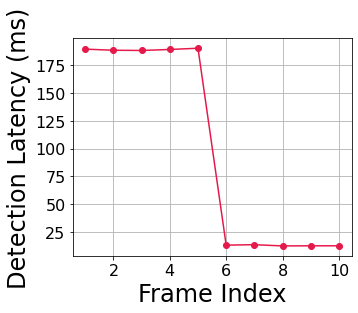

In [42]:
# Cost of adjusting DVFS in Throughput

processing_speed = [189.2, 188.2, 188.0, 188.9, 190.0, 13.4, 13.8, 12.7, 12.8, 12.8]
frame_index = list(range(1, len(processing_speed) + 1))

plot_one_line(frame_index, processing_speed, 'Frame Index', 'Detection Latency (ms)', '')

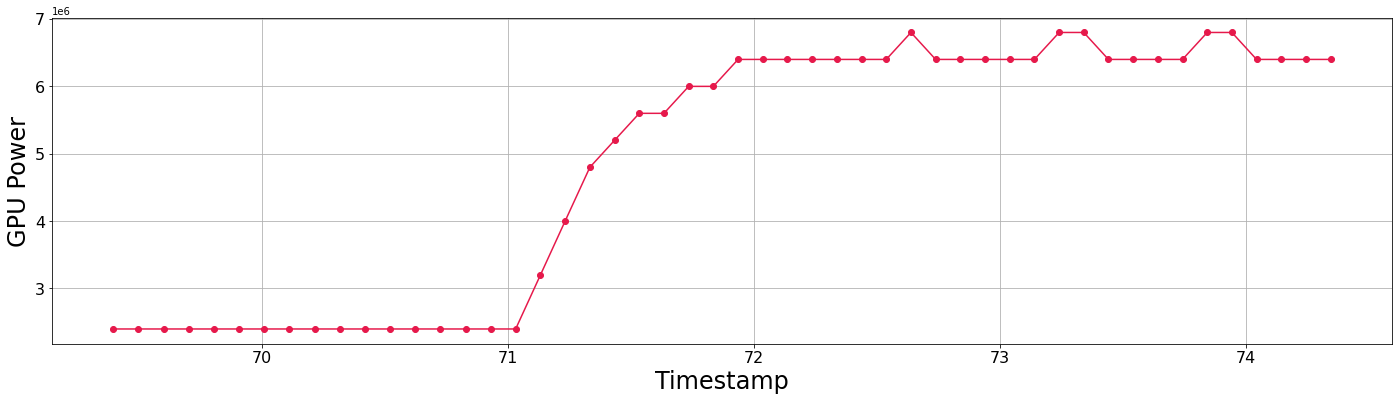

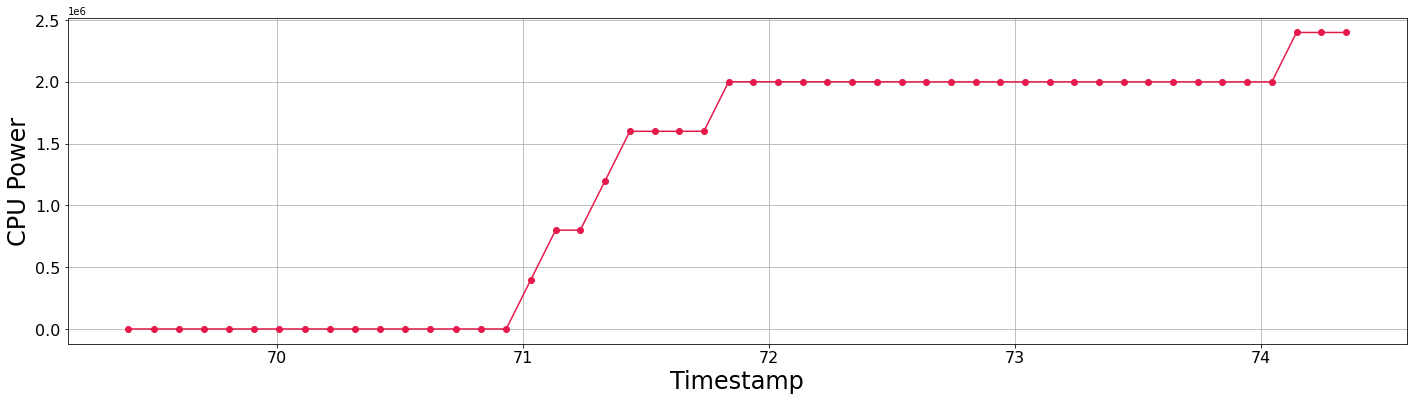

In [43]:
# Cost of adjusting DVFS in Energy

energy_log = load_json('../assets/result/dvfs/freq_change/DVFS-Change-Energy.json')

timestamp_energy = [row[0] for row in energy_log]
gpu_energy = [row[1][0] for row in energy_log]
cpu_energy = [row[1][1] for row in energy_log]

plot_one_line(timestamp_energy[650:700], gpu_energy[650:700], 'Timestamp', 'GPU Power', '', (24, 6))
plot_one_line(timestamp_energy[650:700], cpu_energy[650:700], 'Timestamp', 'CPU Power', '', (24, 6))

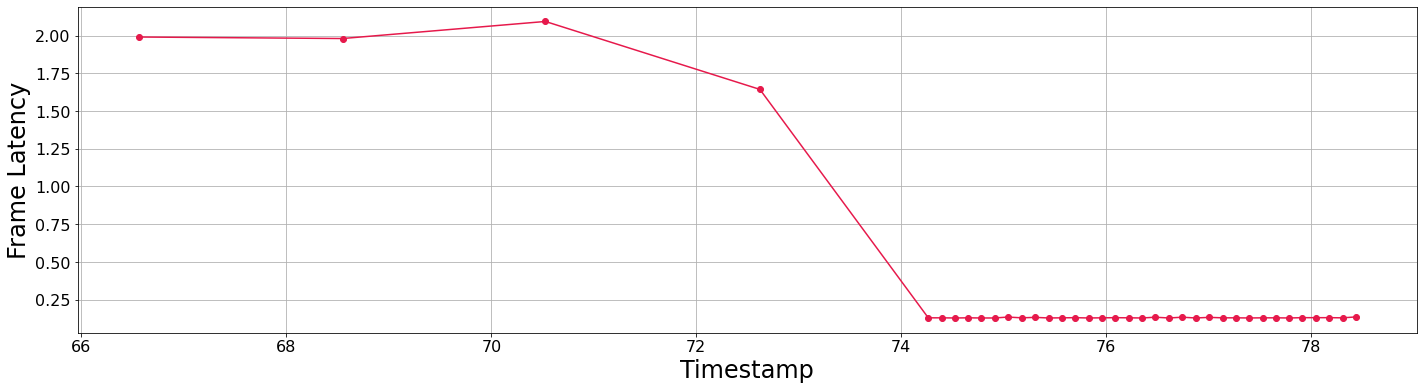

In [44]:
# Cost of adjusting DVFS in Throughput

lines = read_lines_from_file('../assets/result/dvfs/freq_change/DVFS-Change-Throughput.txt')

frame_latency = [float(line.split(', ')[-1][:len(line.split(', ')[-1])-2]) for line in lines]

# Manually FIxed
frame_latency[0] = frame_latency[1]

# MS to S
frame_latency = list(np.array(frame_latency) / 100)

timestamp_latency = []
current_time_sum = 0
for l in frame_latency:
  timestamp_latency.append(current_time_sum)
  current_time_sum += l

plot_one_line(timestamp_latency[33:70], frame_latency[33:70], 'Timestamp', 'Frame Latency', '', (24, 6))

Average Power: 8.371125000000001W


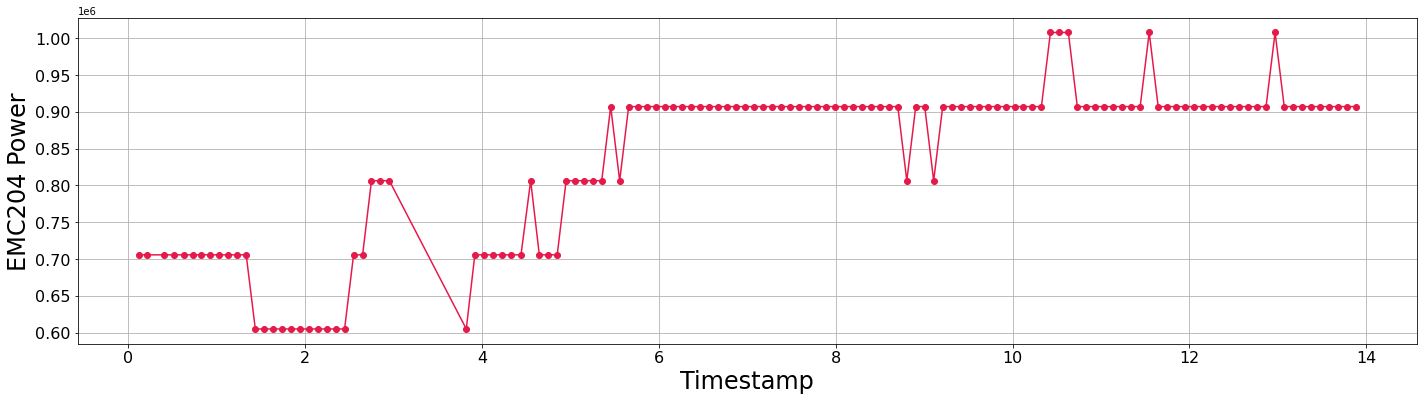

Average Power: 8.574072289156627W


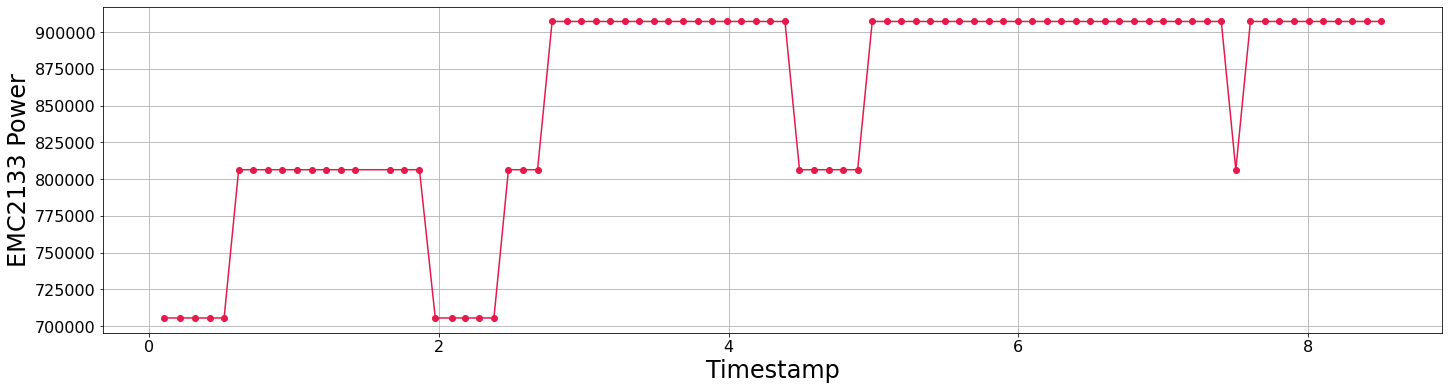

Average Power: 10.415999999999999W


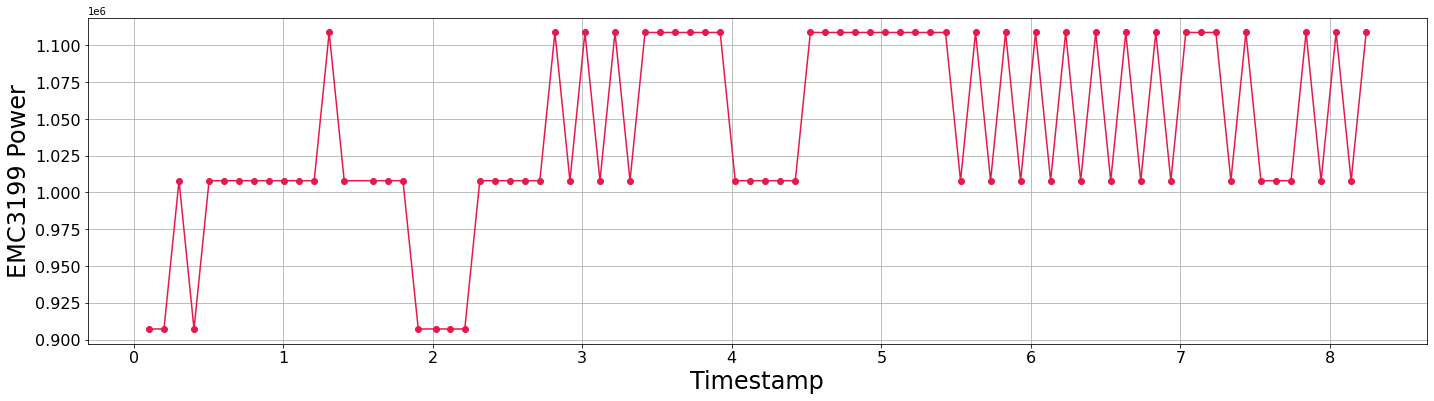

In [45]:
# Compare Average Power for Different Memory Frequency

emc204_energy_log = load_json('../assets/result/dvfs/memory/EMC204-Energy_Log.json')
emc204_timestamp_energy = [row[0] for row in emc204_energy_log]
emc204_emc_energy = [row[1][2] for row in emc204_energy_log]
print(f"Average Power: {np.mean(np.array(emc204_emc_energy) / 100000)}W")
plot_one_line(emc204_timestamp_energy, emc204_emc_energy, 'Timestamp', 'EMC204 Power', '', (24, 6))

emc2133_energy_log = load_json('../assets/result/dvfs/memory/EMC2133-Energy_Log.json')
emc2133_timestamp_energy = [row[0] for row in emc2133_energy_log]
emc2133_emc_energy = [row[1][2] for row in emc2133_energy_log]
print(f"Average Power: {np.mean(np.array(emc2133_emc_energy) / 100000)}W")
plot_one_line(emc2133_timestamp_energy, emc2133_emc_energy, 'Timestamp', 'EMC2133 Power', '', (24, 6))

emc3199_energy_log = load_json('../assets/result/dvfs/memory/EMC3199-Energy_Log.json')
emc3199_timestamp_energy = [row[0] for row in emc3199_energy_log]
emc3199_emc_energy = [row[1][2] for row in emc3199_energy_log]
print(f"Average Power: {np.mean(np.array(emc3199_emc_energy) / 100000)}W")
plot_one_line(emc3199_timestamp_energy, emc3199_emc_energy, 'Timestamp', 'EMC3199 Power', '', (24, 6))